In [130]:
from google.colab import drive
drive.mount("/content/gdrive")
!ls "/content/gdrive/My Drive/data"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
face.csv	      faceDataset2	      model4multiClassfier
faceData	      faceDataWithNumber      model4raceClassfier
faceData2D	      faceDR		      model4sexClassfier
faceData2DWithNumber  faceDS		      model4sexClassfierWithoutValid
face_Dataset	      faceLabel.csv	      rawdata
faceDataset	      model4emotionClassfier  vgg_face_dag.pth


In [131]:
import matplotlib.pyplot as plt  # show image
import numpy as np
import pandas as pd
import sys
import tensorflow as tf

In [132]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [133]:
dtype = np.uint8
shape = (128,128)

# file_path /content/gdrive/My Drive/data/rawdata/xxxx
pre_img_path="/content/gdrive/My Drive/data/rawdata/"
pre_path="/content/gdrive/My Drive/data/"

# Read the data from the binary file
# data = np.fromfile(file_path, dtype=dtype).reshape(shape)

In [134]:


# def readImage(path):
#     with open(path,'rb') as f:
#         # print(path)
#         data = np.fromfile(f, dtype=np.uint8)
#         image_array=np.reshape(data,(128,128))
#         return image_array
#         # return data
    
face=pd.read_csv(pre_path+"faceLabel.csv")

# read image part
# new=True
# for  i in face["number"]:
#     # number=1223
#     if new==True:
#         path=pre_path+f"rawdata/{i}"
#         new_element = np.fromfile(path, dtype=dtype).reshape(shape)
#         dataset = tf.data.Dataset.from_tensor_slices([new_element])
#         new=False
#     else:
#         path=pre_path+f"rawdata/{i}"
#         data = np.fromfile(path, dtype=dtype).reshape(shape)
#         new_element = tf.data.Dataset.from_tensor_slices([data])
#         dataset = dataset.concatenate(new_element)
    # if i>1230:
    #     break
# print(faceData.shape)
# faceData.to_pickle("faceData2D") 
dataset=tf.data.Dataset.load(pre_path+"faceDataset")
print(dataset)


# print(faceData)

# plt.imshow(np.reshape(faceData.iloc[0,1],(128,128)), cmap='cividis', vmin=0, vmax=256)
# plt.show()

<_LoadDataset element_spec=TensorSpec(shape=(128, 128), dtype=tf.uint8, name=None)>


In [135]:
face.head()

,number,sex,age,race,emotion,extra,sex_label,age_adult,age_child,age_senior,age_teen,race_asian,race_black,race_hispanic,race_other,race_white,emotion_funny,emotion_serious,emotion_smiling
0,1223,male,child,white,smiling,NaN,1,0,1,0,0,0,0,0,0,1,0,0,1
1,1224,male,child,white,serious,NaN,1,0,1,0,0,0,0,0,0,1,0,1,0
2,1225,male,child,white,smiling,NaN,1,0,1,0,0,0,0,0,0,1,0,0,1
3,1226,male,child,white,smiling,NaN,1,0,1,0,0,0,0,0,0,1,0,0,1
4,1227,male,child,white,serious,NaN,1,0,1,0,0,0,0,0,0,1,0,1,0


In [136]:
# tf.data.experimental.save(dataset, pre_path+"faceDataset")

In [137]:
num_elements = tf.data.experimental.cardinality(dataset).numpy()

print(f"The concatenated dataset has {num_elements} elements.")

The concatenated dataset has 3993 elements.


In [138]:
def convert_image(image):
    image = tf.expand_dims(image, axis=0)
    image = tf.expand_dims(image, axis=-1)
    return tf.tile(image, [1, 1, 1, 3])
dataset_ = dataset.map(convert_image)

In [139]:
print(dataset_)

<_MapDataset element_spec=TensorSpec(shape=(1, 128, 128, 3), dtype=tf.uint8, name=None)>


In [140]:
# def add_batch_dimension(image):
#     return tf.expand_dims(image, axis=0)
# dataset_ = dataset_.map(convert_image)

In [141]:
# convert dataframe to tensor
# label_tensor=tf.convert_to_tensor(face["sex_label"].values)
# label_tensor=tf.convert_to_tensor(face[["sex_label","age_adult","age_child","age_senior","age_teen","race_asian","race_black","race_hispanic","race_other","race_white","emotion_funny","emotion_serious","emotion_smiling"]].values)
# label_tensor=tf.convert_to_tensor(face[["race_asian","race_black","race_hispanic","race_other","race_white"]].values)
# label_tensor=tf.convert_to_tensor(face[["emotion_funny","emotion_serious","emotion_smiling"]].values)
# label_tensor=tf.convert_to_tensor(face[["age_adult","age_child","age_senior","age_teen"]].values)
label_tensor=tf.convert_to_tensor(face[["sex_label","race_black","race_hispanic","race_other","race_white","emotion_funny","emotion_serious","emotion_smiling"]].values)

In [142]:
num_out_put=label_tensor.shape[1]
print(label_tensor)

tf.Tensor(
[[1 0 0 ... 0 0 1]
 [1 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]], shape=(3993, 8), dtype=int64)


In [143]:
label_tensor_=tf.data.Dataset.from_tensor_slices(label_tensor)

In [144]:
label_tensor_=tf.reshape(label_tensor,(num_elements,1,num_out_put))
label_tensor__=tf.data.Dataset.from_tensor_slices(label_tensor_)

In [145]:
# merge label and data
data_=tf.data.Dataset.zip((dataset_,label_tensor__))
# data_=tf.stack([dataset,label_tensor_.take(8)])

In [146]:
# tf.data.experimental.save(data_, pre_path+"face_Dataset")

In [147]:
print(data_)

<_ZipDataset element_spec=(TensorSpec(shape=(1, 128, 128, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1, 8), dtype=tf.int64, name=None))>


In [148]:
# split train and test sets
# 计算训练集大小（例如，80% 的数据用于训练）
train_size = int(num_elements * 0.8)

# 使用 take 方法获取训练集
ds_train_ = data_.take(train_size)

# 使用 skip 方法获取测试集
ds_valid_ = data_.skip(train_size)

In [149]:
print(ds_valid_)

<_SkipDataset element_spec=(TensorSpec(shape=(1, 128, 128, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1, 8), dtype=tf.int64, name=None))>


In [150]:
# Data Pipeline
def convert_to_float(image,label ):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [151]:
ds_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(1, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(1, 8), dtype=tf.int64, name=None))>

In [152]:
# ds_valid
num_elements1 = tf.data.experimental.cardinality(ds_train_).numpy()

print(f"The concatenated ds_train has {num_elements1} elements.")

The concatenated ds_train has 3194 elements.


The **InceptionV1** model pretrained on ImageNet is available in the [TensorFlow Hub](https://www.tensorflow.org/hub/) repository, but we'll load it from a local copy. Run this cell to load InceptionV1 for your base.

In [153]:
# !pip install mmdnn

In [154]:
# !mmconvert -sf pytorch -in http://www.robots.ox.ac.uk/~albanie/models/pytorch-mcn/vgg_face_dag.pth -df tensorflow -om /content/gdrive/data/vgg_face.pb   

In [155]:
import tensorflow_hub as hub

# pretrained_base = tf.keras.models.load_model(
#     '/content/gdrive/My Drive/data/vgg_face.pb'
# )
# pretrained_base = hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/5")
pretrained_base = hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/classification/5")

# 1) Define Pretrained Base #

Now that you have a pretrained base to do our feature extraction, decide whether this base should be trainable or not.

In [156]:
# YOUR_CODE_HERE
pretrained_base.trainable = False



In [157]:
# Lines below will give you a hint or solution code
#q_1.hint()
#q_1.solution()

# 2) Attach Head #

Now that the base is defined to do the feature extraction, create a head of `Dense` layers to perform the classification, following this diagram:

<figure>
<img src="https://storage.googleapis.com/kaggle-media/learn/images/i5VU7Ry.png" alt="Diagram of the dense head.">
</figure>


In [162]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dropout(0.1),
    layers.Dense(50*num_out_put, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(12*num_out_put, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_out_put, activation='sigmoid'),
])


# 3) Train #

Before training a model in Keras, you need to specify an *optimizer* to perform the gradient descent, a *loss function* to be minimized, and (optionally) any *performance metrics*. The optimization algorithm we'll use for this course is called ["Adam"](https://keras.io/api/optimizers/adam/), which generally performs well regardless of what kind of problem you're trying to solve.

The loss and the metrics, however, need to match the kind of problem you're trying to solve. Our problem is a **binary classification** problem: `Car` coded as 0, and `Truck` coded as 1. Choose an appropriate loss and an appropriate accuracy metric for binary classification.

In [163]:
# YOUR CODE HERE: what loss function should you use for a binary
# classification problem? (Your answer for each should be a string.)
# optimizer = tf.keras.optimizers.Adam(epsilon=0.01)
model.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=['accuracy'],
)



In [165]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint('model-{epoch:02d}.h5', save_weights_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15,restore_best_weights=True)

In [166]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=200,
    callbacks=[checkpoint,early_stopping]
)

Epoch 1/200
3194/3194 [==============================] - 34s 10ms/step - loss: 0.3236 - accuracy: 0.5235 - val_loss: 0.4238 - val_accuracy: 0.1615
Epoch 2/200
3194/3194 [==============================] - 33s 10ms/step - loss: 0.3102 - accuracy: 0.4483 - val_loss: 0.3478 - val_accuracy: 0.3342
Epoch 3/200
3194/3194 [==============================] - 30s 10ms/step - loss: 0.3100 - accuracy: 0.4496 - val_loss: 0.3850 - val_accuracy: 0.3066
Epoch 4/200
3194/3194 [==============================] - 30s 9ms/step - loss: 0.3047 - accuracy: 0.4314 - val_loss: 0.3560 - val_accuracy: 0.2866
Epoch 5/200
3194/3194 [==============================] - 30s 9ms/step - loss: 0.3003 - accuracy: 0.3986 - val_loss: 0.3433 - val_accuracy: 0.3016
Epoch 6/200
3194/3194 [==============================] - 30s 9ms/step - loss: 0.3047 - accuracy: 0.4433 - val_loss: 0.4125 - val_accuracy: 0.3066
Epoch 7/200
3194/3194 [==============================] - 31s 10ms/step - loss: 0.2907 - accuracy: 0.4512 - val_loss: 0.32

In [ ]:
model.summary()

Run the cell below to plot the loss and metric curves for this training run.

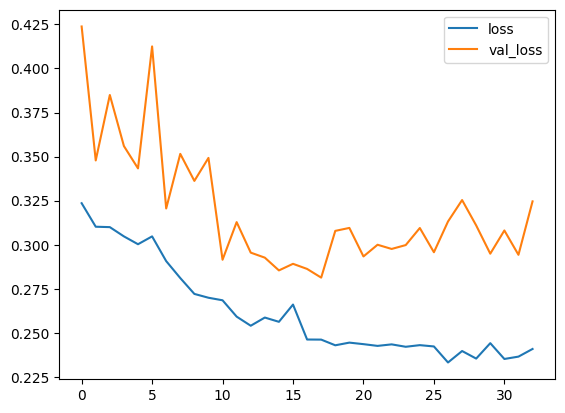

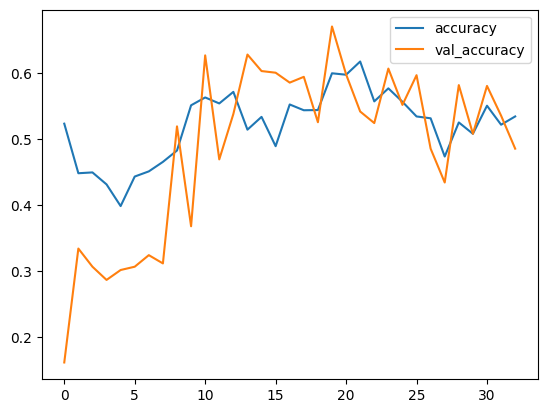

In [167]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [ ]:
# model.predict(ds_valid)

In [ ]:
for layer in model.layers:
  if isinstance(layer,layers.Dense):
    print((layer.get_weights()))
    break
    # print(layer)


In [ ]:
i=0
for e in ds_valid:
  # print(e[1])
  # print(e[0])
  # prediction=model.predict(e[0])
  # print(prediction)
  # print([1 if i>0.5 else 0 for i in l ])
  i+=1
  if i>230:
    print(e[1])
    # print(e[0])
    prediction=model.predict(e[0])
    print(prediction)
    break

In [ ]:

print([1 if i>0.5 else 0 for i in prediction[0]])

In [168]:
# # 定义输入和输出
# inputs = {'input_image': model.input}
# outputs = {'output_scores': model.output}

# 导出模型
tf.saved_model.save(model, pre_path+"model4multiClassfier(exceptAge)")

In [ ]:
model_load=tf.saved_model.load(pre_path+"model4multiClassfier")

In [ ]:
print(model_load.signatures.keys())

In [ ]:
# model.predict(ds_valid_)

In [ ]:
for e in ds_valid:
  print(e[1])
  # print(e[0])
  prediction=model_load.signatures['serving_default'](e[0])
  print(prediction)
  # print([1 if i>0.5 else 0 for i in l ])
  break

In [ ]:
print(prediction['dense_9'].numpy())

In [ ]:
print([1 if i>0.5 else 0 for i in prediction['dense_9'].numpy()[0]])